In [2]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

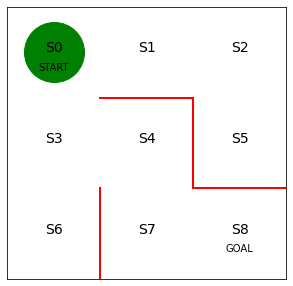

In [3]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [4]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [5]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수


def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 단순 비율을 계산하는 코드

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [6]:
# 초기 정책 pi_0을 계산
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [7]:
# 행동 a를 취한 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]

In [8]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다


def goal_maze_ret_s_a(pi):
    s = 0  # 시작 지점
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 현재 상태(마지막이므로 인덱스가 -1)를 히스토리에 추가

        s_a_history.append([next_s, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다.

        if next_s == 8:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return s_a_history

In [9]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다


In [11]:
# theta를 수정하는 함수
def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 상태 i에서 행동 j를 취한 경우만 모음

                N_i = len(SA_i)  # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수 
                
                # 초판에서 부호 오류가 있었음(수정일 : 1807030
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [12]:
# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.49687504 0.50312496]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.50156249 0.49843751]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49843751 0.50156249 0.         0.        ]]


In [13]:
# 정책 경사 알고리즘으로 미로 빠져나오기
stop_epsilon = 10**-4  # 정책의 변화가 10^-4 보다 작아지면 학습을 종료

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continue가 False가 될 때까지 반복
    s_a_history = goal_maze_ret_s_a(pi)  # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history)  # 파라미터 Θ를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 정책 π를 수정

    print(np.sum(np.abs(new_pi - pi)))  # 정책의 변화를 출력
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.012911015586832664
목표 지점에 이르기까지 걸린 단계 수는 34단계입니다
0.013729091633261914
목표 지점에 이르기까지 걸린 단계 수는 70단계입니다
0.009056802966193045
목표 지점에 이르기까지 걸린 단계 수는 46단계입니다
0.007296099947581403
목표 지점에 이르기까지 걸린 단계 수는 110단계입니다
0.013811838371624974
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
0.020384875017618265
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.004797289872125188
목표 지점에 이르기까지 걸린 단계 수는 134단계입니다
0.016068949172936886
목표 지점에 이르기까지 걸린 단계 수는 34단계입니다
0.018736855883087322
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.011246358377256016
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.026625190922886344
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.008831273027575137
목표 지점에 이르기까지 걸린 단계 수는 126단계입니다
0.007713450026969937
목표 지점에 이르기까지 걸린 단계 수는 94단계입니다
0.013654774523191415
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.022695743435976412
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.015538285200237034
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.010680157554602332
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.011513431570279453
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.011363538866035028
목표 지점에 이르기까지 걸린 단계 수는 78단계입니다
0.009682769395139512
목표 지점에 

0.013189994709183042
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.022270993108203185
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.014482082753063438
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.011702455759661806
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014261027745927302
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.010476684485848861
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.01157628514561676
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014087343144484205
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.015154586373071682
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013876571194056955
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.01368940830869797
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.013505496374312448
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.01471521166336806
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013311676029968814
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.009583518413027708
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.016214818526796543
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.013186495006388368
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.013010875827342491
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.01583141017336681
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011217708777898669
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.

0.008865732192931103
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.004976244268061314
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004928285127808588
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008037049020772888
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004879637993166708
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0048330720746858485
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004787129652942465
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.009216745627656425
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.004753058211182687
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004708183288516105
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004663904781316369
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004620212936957552
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0045770981806094735
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.012733602853424245
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.004577066269307775
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0045346257032297665
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.010267293127690286
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.004579945483041137
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004537338500710392
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.004495291280797661
목표 지점에 이르기까지 걸린 단계 수는 4단

0.001775532264489628
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0017646652468436205
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0017538963821819922
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001743224506542733
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0017326484729451863
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.005063005748859074
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001740392894489233
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001729828731357179
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008598916820497716
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.005105004614482725
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0017445330095505335
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001733939211617859
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0017234404634589723
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001713035643956931
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001702723648280044
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001692503387608145
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0016823737888532891
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0016723337943937988
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.005042885280116434
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.001682900057981336
목표 지점에 이르기까지 걸린 단계 수는 

0.0008604729662823572
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008567434242308103
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008530379580120283
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003279448764790846
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003582260745374769
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0008711062235067582
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008672960449718735
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008635107300368795
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008597500632597024
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008560138315206987
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0028941754447687
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0008603267776306177
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008565906724721552
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008528787513838038
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008491908066930454
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008455266329475998
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000841886026883544
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0035577211928931943
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0008513100990857198
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0008476185178742379
목표 지점에 이르기까지 걸린

0.000448405300709432
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00044701111352434333
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004456233500216532
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00044424197112329436
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004428669380478409
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000441498212302438
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004401357556866742
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00043877953028526734
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004374294984672636
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000436085622884521
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004347478664664742
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00043341619242070334
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00043209056422699454
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000430770945639182
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00042945730067956225
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0022280189953006214
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0004333281261981771
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0004320026646577532
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002128888190647823
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00043469797289563683
목표 지점에 

0.0003491292676212482
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034815902787616385
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034719280955521764
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003462305905293922
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034527234881879046
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034431806259589345
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034336771018068923
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0019072878616912814
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0019531369515684294
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0003494957053105305
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003485265430375577
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003475613823688724
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0020561383903046765
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00035125369846995824
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003502765322393499
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0020805916553299567
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.006113855356582796
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0003565966636886672
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00035559694871074854
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00035460140913681076
목

0.00021865755508734992
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002181747830825153
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002176936020331071
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002172140049720335
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021673598497314213
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021625953514482592
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002157846486370383
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021531131863274447
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021483953835489157
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021436930106232335
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021390060004994847
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002134334286497553
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021296778022951088
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001618689214753024
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00021586871365500936
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002153944517200388
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0016521446412700123
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0002184490185039717
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021796538234959868
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00021748334710591614

0.0001955352873118637
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019511822218106802
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019470250066857403
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019428811696379188
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019387506528917818
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001934633398967614
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019305293507147596
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019264384512760954
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001922360644113011
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019182958729889628
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019142440819687988
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001910205215433624
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019061792180271805
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019021660347454117
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018981656108315627
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018941778918468884
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018902028236453088
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018862403523561312
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018822904244124652
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018783529865

0.00013583828536913034
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001355837043023455
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013532986993474577
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013507677923122255
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013482442917544038
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013457281676475946
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013432193901358885
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013407179295243064
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013382237562425264
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013357368409160943
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013332571542877536
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013307846672715694
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000132831935092741
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013258611764683723
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013234101152414385
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013209661387696137
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013185292186912098
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001316099326817751
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013136764350885413
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00013112605155

0.0001091513055167092
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010897532561834032
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010879977838179622
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010862466236418768
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010844997612828935
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010827571824325449
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010810188728473634
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010792848183329914
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010775550047671667
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010758294180725388
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010741080442523351
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010723908693428472
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010706778794636156
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010689690607804635
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010672643995082026
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010655638819456227
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001063867494416424
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010621752233304707
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00010604870551401101
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000105880297

In [14]:
# 학습이 끝난 정책을 확인
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.013 0.987 0.   ]
 [0.    0.277 0.    0.723]
 [0.    0.    0.414 0.586]
 [0.009 0.98  0.011 0.   ]
 [0.    0.    0.981 0.019]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [15]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)


def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


#　초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())